#PREDICTION USING DECISION TREE ALGORITHM#

**TASK**:- *Create the Decision tree classifier and visualize it graphically*

In [97]:
# First of all we will upload the dataset

from google.colab import files
a = files.upload()

Saving Iris.csv to Iris (1).csv


**IMPORTING THE LIBRARIES**

In [98]:
# Now we will import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


**IMPORTING THE DATASET**

In [133]:
#Now we will import the data set and try to visulaize it
data = sklearn.datasets.load_iris()
data_ = pd.DataFrame(data.data,columns=data.feature_names)
data_['Species'] = data.target

data_.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [134]:
# Try to get the information about the columns in the dataset provided by us
data_.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [135]:
#Here we are decribing the descriptive statistics of the  dataset
data_.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [139]:
X=data_.values[:,0:4]
y=data.target

**DATA VISUALIZATION**

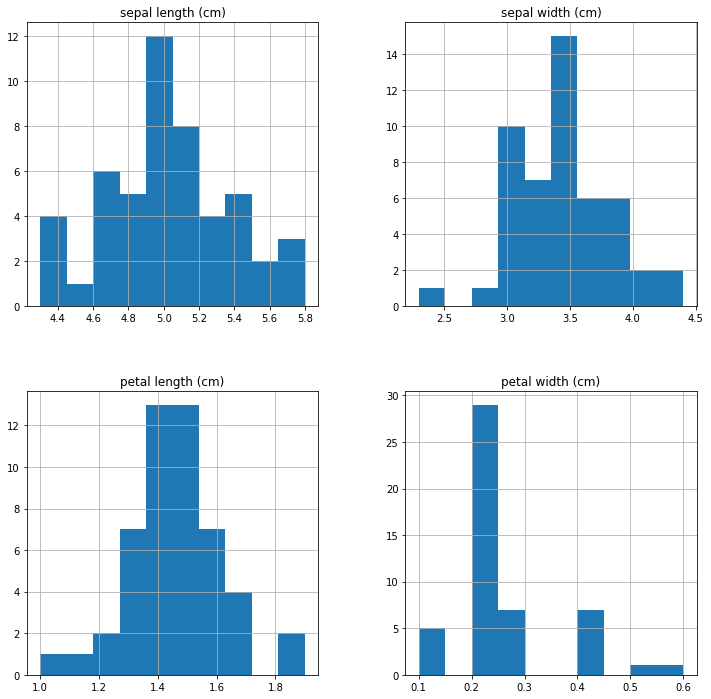

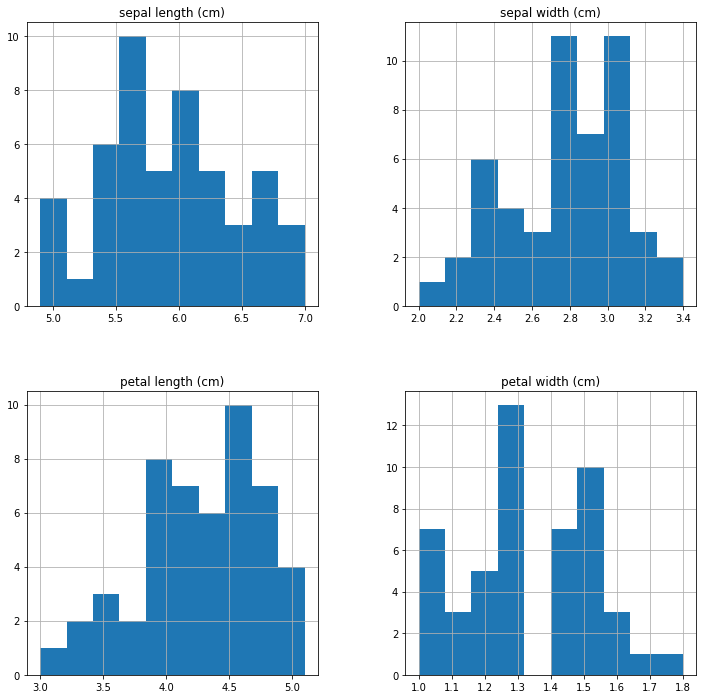

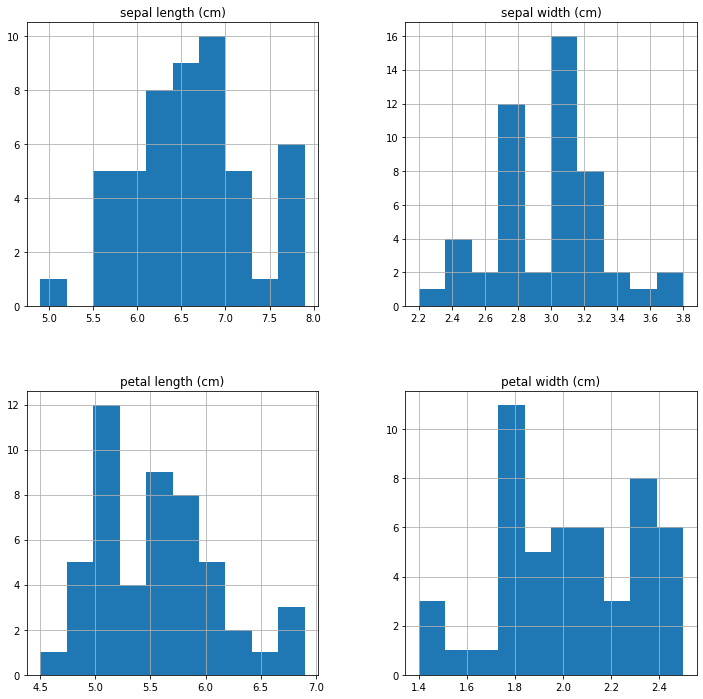

In [141]:
data_.groupby('Species').hist(figsize = (12,12))

dataframe = pd.DataFrame(y)

**CREATING MODEL**

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



**DECISION MAKING IN DECISION TREE**

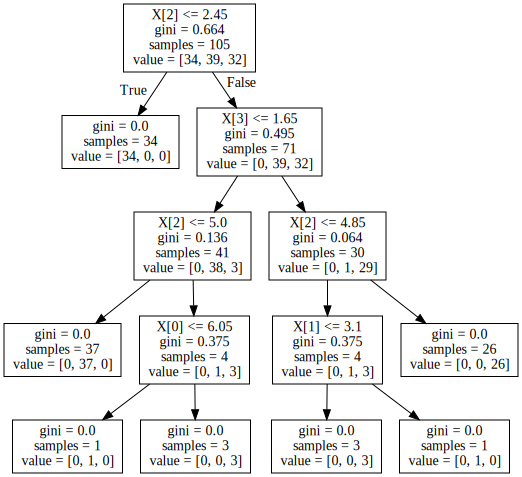

In [154]:
import graphviz
dot_data = tree.export_graphviz(classifier)
graph = graphviz.Source(dot_data,format="png")
graph

**PREDICTING THE TEST SET RESULTS**

In [158]:
y_pred = classifier.predict(X_test)
print(y_pred)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


**MAKING THE CONFUSION MATRIX**

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


**COMPUTING THE ACCURACY WITH K-FOLD CROSS VALIDATION**

In [152]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier, X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f}%".format(accuracy.mean()*100))
print("Standard deviation: {:.2f}%".format(accuracy.std()*100))

Accuracy: 97.27%
Standard deviation: 4.17%


*So by looking at the accuracy we can tell that our model is working very accurately and if we will feed any new data it will correctly output it's right class*